In [ ]:
import torch
import gpytorch
import matplotlib.pyplot as plt
import seaborn as sns

### Radial Basis Function (Exponential Sine Squared) Kernel

In [43]:
x = torch.linspace(-5, 5, 50).reshape(-1, 1)

In [65]:
rbf_kernel = gpytorch.kernels.RBFKernel()

kernel_func = rbf_kernel(x)

mvd = gpytorch.distributions.MultivariateNormal(
    mean=torch.zeros(50),
    covariance_matrix=kernel_func
)

mvd_samples = mvd.sample_n(5)

/Users/wastechs/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/torch/distributions/distribution.py:161: UserWarning: sample_n will be deprecated. Use .sample((n,)) instead
  warnings.warn('sample_n will be deprecated. Use .sample((n,)) instead', UserWarning)


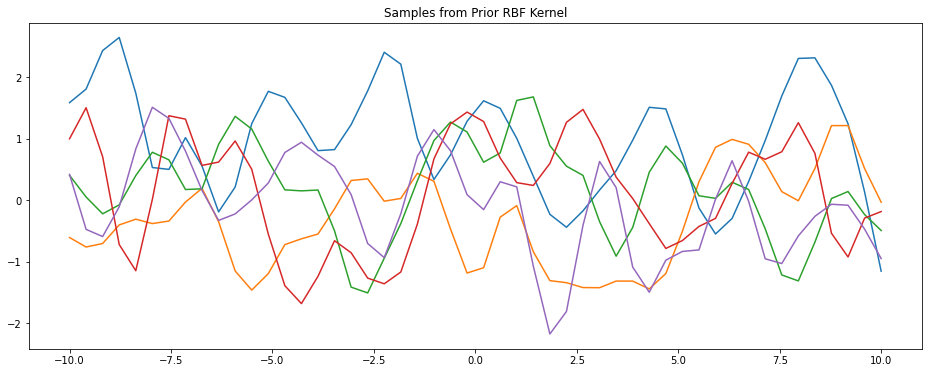

In [66]:
plt.figure(figsize=(16, 6))
[plt.plot(x, sample) for sample in mvd_samples]
plt.title('Samples from Prior RBF Kernel')
plt.show()

### Periodic Kernel

In [67]:
x = torch.linspace(-10, 10, 50).reshape(-1, 1)

In [68]:
periodic_prior = gpytorch.priors.GammaPrior(2, 1)
periodic_lengthscale_prior = gpytorch.priors.GammaPrior(2, 1)

periodic_kernel = gpytorch.kernels.PeriodicKernel(
    period_length_prior=periodic_prior
)

periodic_kernel.lengthscale = periodic_lengthscale_prior.mean

periodic_kernel_func = periodic_kernel(x)

mvd = gpytorch.distributions.MultivariateNormal(
    mean=torch.zeros(50),
    covariance_matrix=periodic_kernel_func
)

mvd_samples = mvd.sample_n(5)

/Users/wastechs/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/torch/distributions/distribution.py:161: UserWarning: sample_n will be deprecated. Use .sample((n,)) instead
  warnings.warn('sample_n will be deprecated. Use .sample((n,)) instead', UserWarning)
/Users/wastechs/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/gpytorch/utils/cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(
/Users/wastechs/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/gpytorch/utils/cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-05 to the diagonal
  warnings.warn(


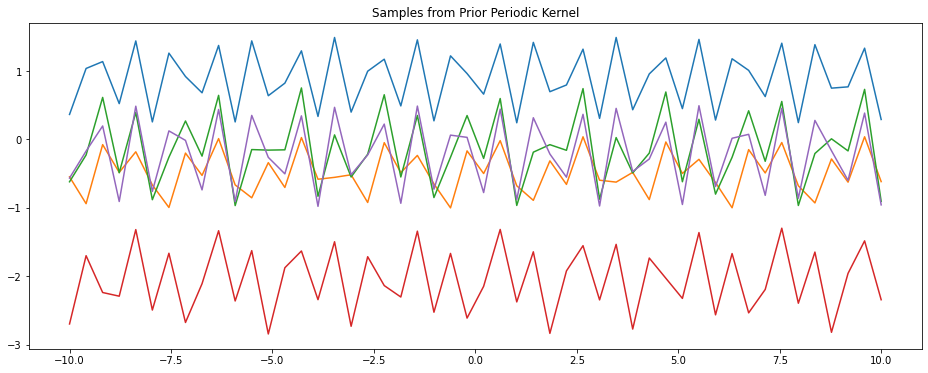

In [69]:
plt.figure(figsize=(16, 6))
[plt.plot(x, sample) for sample in mvd_samples]
plt.title('Samples from Prior Periodic Kernel')
plt.show()

### Rational Quadratic Kernel

In [70]:
x = torch.linspace(-10, 10, 50).reshape(-1, 1)

In [71]:
#periodic_prior = gpytorch.priors.GammaPrior(2, 1)
#periodic_lengthscale_prior = gpytorch.priors.GammaPrior(2, 1)

rational_quadratic = gpytorch.kernels.RQKernel(
    #period_length_prior=periodic_prior
)

#periodic_kernel.lengthscale = periodic_lengthscale_prior.mean

rational_quadratic_func = rational_quadratic(x)

mvd = gpytorch.distributions.MultivariateNormal(
    mean=torch.zeros(50),
    covariance_matrix=rational_quadratic_func
)

mvd_samples = mvd.sample_n(5)

/Users/wastechs/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/torch/distributions/distribution.py:161: UserWarning: sample_n will be deprecated. Use .sample((n,)) instead
  warnings.warn('sample_n will be deprecated. Use .sample((n,)) instead', UserWarning)


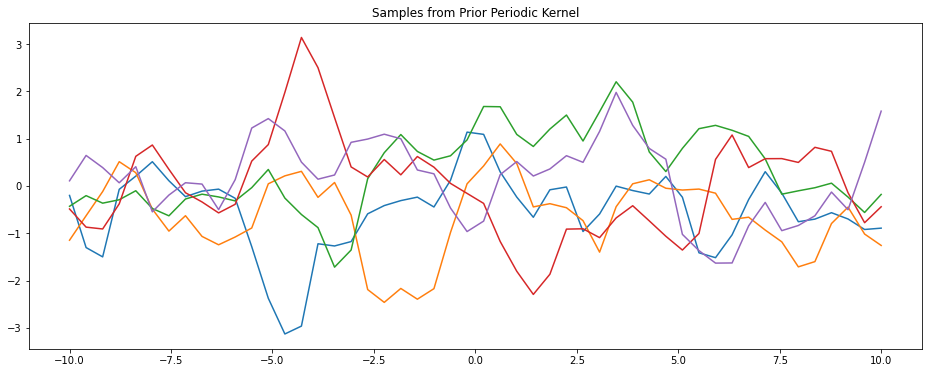

In [72]:
plt.figure(figsize=(16, 6))
[plt.plot(x, sample) for sample in mvd_samples]
plt.title('Samples from Prior Periodic Kernel')
plt.show()